In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy import constants
%matplotlib inline

In [3]:
# Parametersfor the benchmarking
fps=295
dt=1/fps
spacial_resolution=30E-06  # 

# Generate a sample of 1000 random numbers from a uniform distribution to act as the x coordinates of the particles
left=0
right=1751
unif_x = sts.uniform(left, right-left)
sample_x=unif_x.rvs(1000)
# print(sample_v)
# fig, ax = plt.subplots()
# ax.hist(sample_v,100) # plot histogram
# ax.set_xlabel('x')
# ax.set_ylabel('measurements')
sample_x_trunc= sample_x.astype(int)
# print(sample_x_trunc)
sample_x_SI=sample_x_trunc*spacial_resolution
# print(sample_x_SI)


0.0006926383579377664


Text(0, 0.5, 'measurements')

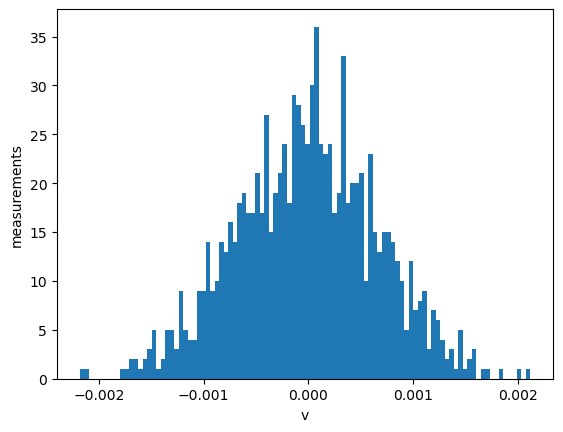

In [4]:
# Generate a sample of 1000 random velocities from a normal distribution
mu = 0
mass = 4.0 / 3.0 * np.pi * (7.14E-6 / 2.0)**3 * 1510.0 #mass of the dust particles
# print(mass)
kb=constants.Boltzmann
T=10000        # try it with 10000
sigma = np.sqrt(kb*T/mass)
print(sigma)
norm_rv = sts.norm(mu, sigma)
sample_v = norm_rv.rvs(1000) #generate a sample of certain size
# print(sample_v)
fig, ax = plt.subplots()
ax.hist(sample_v, 100) # plot histogram
ax.set_xlabel('v')
ax.set_ylabel('measurements')
# print(sample_v)

Text(0, 0.5, 'measurements')

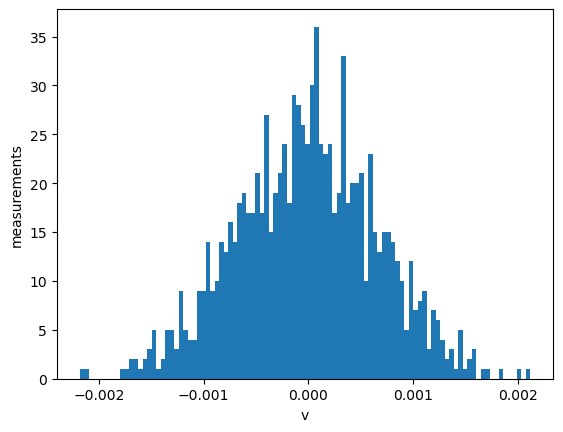

In [5]:
# Simulating the motion of the particles
x_forward=sample_x_SI+sample_v*dt
x_forward_trunc=x_forward/spacial_resolution
# print(x_forward_trunc)
x_forward_trunc=x_forward_trunc.astype(int)
x_forward_SI=x_forward_trunc*spacial_resolution
# print(x_forward_SI)
fig, ax = plt.subplots()
ax.hist(sample_v, 100) # plot histogram
ax.set_xlabel('v')
ax.set_ylabel('measurements')
# print(sample_v)

In [6]:
# Calculating restored velocities
v_restored=(x_forward_SI-sample_x_SI)/dt
# print(v_restored)


# Calculating the discrepancy between the original and restored velocities
discrepancy=np.abs(sample_v-v_restored)
print(np.mean(discrepancy))
frac_discrepancy=discrepancy/sample_v
print(np.mean(frac_discrepancy))
percent_discrepancy=frac_discrepancy*100
print(np.mean(percent_discrepancy))

0.004423028408870131
-46.528288696429186
-4652.828869642918
